# 1. Problématique

# 2. Nettoyage et préparation des données

In [3]:
import pandas as pd

# Chargement des fichiers
df_student = pd.read_csv("Data_africa_education_student.csv")
df_inactive = pd.read_csv("Data_africa_education_inactive.csv")
df_unemployed = pd.read_csv("Data_africa_education_unemployed.csv")
df_sector_employed = pd.read_csv("Data_africa_sector_employed.csv")
df_rural_urban = pd.read_csv("Data_employed_rural_urban.csv")

In [4]:
# Affichage des données
df_rural_urban.sample(10)

,ccode,country,year,age,gender,status,urban,population,education,sector,sector_group,informal
8390,BFA,Burkina Faso,2016,34,male,unemployed,urban,2061,NaN,NaN,NaN,NaN
25021,COG,Congo,2019,34,male,employed,urban,15507,NaN,NaN,NaN,NaN
56553,GNQ,Equatorial Guinea,2015,28,female,employed,urban,1594,NaN,NaN,NaN,NaN
114646,SWZ,Eswatini,2015,20,male,employed,urban,1017,NaN,NaN,NaN,NaN
1414,AGO,Angola,2023,23,male,unemployed,rural,3935,NaN,NaN,NaN,NaN
11956,BWA,Botswana,2022,18,male,employed,rural,2328,NaN,NaN,NaN,NaN
39235,EGY,Egypt,2024,26,female,unemployed,rural,5666,NaN,NaN,NaN,NaN
83674,MUS,Mauritius,2017,16,female,unemployed,urban,569,NaN,NaN,NaN,NaN
24409,COG,Congo,2016,21,female,employed,rural,5165,NaN,NaN,NaN,NaN
66435,LBY,Libya,2023,31,male,employed,urban,25615,NaN,NaN,NaN,NaN


In [5]:
# Structure des données
df_rural_urban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145080 entries, 0 to 145079
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ccode         145080 non-null  object 
 1   country       145080 non-null  object 
 2   year          145080 non-null  int64  
 3   age           145080 non-null  int64  
 4   gender        145080 non-null  object 
 5   status        145080 non-null  object 
 6   urban         145080 non-null  object 
 7   population    145080 non-null  int64  
 8   education     0 non-null       float64
 9   sector        0 non-null       float64
 10  sector_group  0 non-null       float64
 11  informal      0 non-null       float64
dtypes: float64(4), int64(3), object(5)
memory usage: 13.3+ MB


In [6]:
# Pourcentage de valeurs manquantes par colonne pour df_sector_employed
percent_missing = (df_rural_urban.isna().sum() / df_rural_urban.shape[0])*100
percent_missing.sort_values(ascending=False)

education       100.0
sector          100.0
sector_group    100.0
informal        100.0
ccode             0.0
country           0.0
year              0.0
age               0.0
gender            0.0
status            0.0
urban             0.0
population        0.0
dtype: float64

In [7]:
# Fusion des 3 fichiers "student", "inactive", "unemployed" dans un seul DataFrame

# Harmonisation des colonnes : renommage
def nettoyer_df_education(df, statut):
    df = df.rename(columns={
        'gender': 'sex',
        'education': 'education_level'
    })
    df['status'] = statut
    colonnes_utiles = ['country', 'year', 'age', 'sex', 'education_level', 'status', 'population']
    return df[colonnes_utiles]

# Application sur les 3 fichiers
df_inactive_clean = nettoyer_df_education(df_inactive, 'inactive')
df_student_clean = nettoyer_df_education(df_student, 'student')
df_unemployed_clean = nettoyer_df_education(df_unemployed, 'unemployed')

# Fusion verticale
df_education_combined = pd.concat([
    df_inactive_clean,
    df_student_clean,
    df_unemployed_clean
], axis=0).reset_index(drop=True)

# Par précaution : suppression des colonnes parasites (si jamais elles réapparaissent)
colonnes_vides = ["sector", "sector_group", "urban_rural", "informal_formal", "ccode"]
df_education_combined_clean = df_education_combined.drop(columns=colonnes_vides, errors='ignore')

# Vérification
print("Colonnes après nettoyage :", df_education_combined_clean.columns.tolist())
print("Forme du DataFrame nettoyé :", df_education_combined_clean.shape)

Colonnes après nettoyage : ['country', 'year', 'age', 'sex', 'education_level', 'status', 'population']
Forme du DataFrame nettoyé : (397245, 7)


In [8]:
# Affichage des données des 3 fichiers combinés
df_education_combined_clean

,country,year,age,sex,education_level,status,population
0,Angola,2015,15,female,secondary,inactive,95
1,Angola,2015,15,female,no,inactive,1072
2,Angola,2015,15,female,primary,inactive,572
3,Angola,2015,15,male,primary,inactive,39276
4,Angola,2015,15,male,no,inactive,29323
...,...,...,...,...,...,...,...
397240,Uganda,2030,35,female,tertiary,unemployed,1258
397241,Uganda,2030,35,male,no,unemployed,2164
397242,Uganda,2030,35,male,primary,unemployed,2971
397243,Uganda,2030,35,male,secondary,unemployed,2310


In [9]:
# Suppression des colonnes entièrement vides
df_sector_employed_clean = df_sector_employed.drop(
    ['education', 'urban_rural', 'informal_formal'], axis=1
)

# Renommage pour plus de clarté
df_sector_employed_clean = df_sector_employed_clean.rename(columns={
    'population': 'employed_population'
})

In [10]:
# Suppression des colonnes non renseignées ou redondantes
df_rural_urban_clean = df_rural_urban.drop(
    ['education', 'sector', 'sector_group', 'informal'], axis=1
)

# Renommage pour clarté
df_rural_urban_clean = df_rural_urban_clean.rename(columns={
    'population': 'rural_urban_employed_population'
})

# NB : Il faut exécuter toutes les cellules pour que les graphiques apparaissent (ils sont interactifs).
# Auusi, il faut sélectionner Sénégal sur la liste déroulante des pays car les analyses ne sont faites que pour les graphiques de ce pays.

# 3. Analyse exploratoire des données (EDA)

In [13]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, Dropdown

# Harmonisation du nom de colonne si nécessaire
df_education_combined_clean = df_education_combined_clean.rename(columns={"sex": "gender"})

# Liste des pays avec option "Tous"
pays_liste = ["Tous les pays"] + sorted(df_education_combined_clean["country"].dropna().unique().tolist())

@interact(
    country=Dropdown(options=pays_liste, description="Pays")
)
def graphique_education_par_genre_sans_statut(country):
    df_filtre = df_education_combined_clean.copy()

    if country != "Tous les pays":
        df_filtre = df_filtre[df_filtre["country"] == country]

    # Agrégation
    df_agg = df_filtre.groupby(["education_level", "gender"], as_index=False)["population"].sum()

    # Ordres explicites
    df_agg["education_level"] = pd.Categorical(
        df_agg["education_level"],
        categories=["no education", "primary", "secondary", "tertiary"],
        ordered=True
    )
    df_agg["gender"] = pd.Categorical(
        df_agg["gender"],
        categories=["female", "male"],
        ordered=True
    )

    # Graphique
    fig = px.bar(
        df_agg,
        x="education_level",
        y="population",
        color="gender",
        text_auto=".2s",
        barmode="group",
        title=f"Répartition des jeunes par niveau d’éducation et genre – {country if country != 'Tous les pays' else 'Tous pays'}",
        labels={
            "education_level": "Niveau d'éducation",
            "population": "Nombre de personnes",
            "gender": "Genre"
        },
        color_discrete_sequence=["#EF553B", "#636EFA"]
    )

    fig.update_layout(
        xaxis_title="Niveau d'éducation",
        yaxis_title="Nombre de personnes",
        title_font_size=16,
        legend_title="Genre",
        uniformtext_minsize=10,
        uniformtext_mode='hide'
    )

    fig.show()

interactive(children=(Dropdown(description='Pays', options=('Tous les pays', 'Algeria', 'Angola', 'Benin', 'Bo…

In [14]:
# Liste pour le filtre pays
pays_liste = ["Tous les pays"] + sorted(df_education_combined_clean["country"].dropna().unique().tolist())

@interact(
    country=Dropdown(options=pays_liste, description="Pays")
)
def graphique_statut_par_genre(country):
    df_filtre = df_education_combined_clean.copy()

    # Filtrage pays
    if country != "Tous les pays":
        df_filtre = df_filtre[df_filtre["country"] == country]

    # Agrégation par statut et genre
    df_statut = df_filtre.groupby(["status", "gender"], as_index=False)["population"].sum()
    
    # Ordre souhaité
    statut_order = ["student", "inactive", "unemployed"]
    df_statut["status"] = pd.Categorical(df_statut["status"], categories=statut_order, ordered=True)
    df_statut["gender"] = pd.Categorical(df_statut["gender"], categories=["female", "male"], ordered=True)

    # Graphique
    fig = px.bar(
        df_statut,
        x="status",
        y="population",
        color="gender",
        text_auto=".2s",
        barmode="group",
        title=f"Répartition des jeunes (15–35 ans) par statut d'activité et genre – {country if country != 'Tous les pays' else 'Tous pays'}",
        labels={
            "status": "Statut d'activité",
            "population": "Nombre de personnes",
            "gender": "Genre"
        },
        color_discrete_sequence=["#EF553B", "#636EFA"]
    )

    fig.update_layout(
        xaxis_title="Statut d'activité",
        yaxis_title="Nombre de personnes",
        title_font_size=16,
        legend_title="Genre",
        uniformtext_minsize=10,
        uniformtext_mode='hide'
    )

    fig.show()

interactive(children=(Dropdown(description='Pays', options=('Tous les pays', 'Algeria', 'Angola', 'Benin', 'Bo…

In [15]:
# Palette de couleurs cohérente
custom_colors = {
    "student": "#2ca02c",    # vert
    "inactive": "#ffcc00",   # jaune
    "unemployed": "#d62728"  # rouge
}

# Liste des pays
pays_liste = ["Tous les pays"] + sorted(df_education_combined_clean["country"].dropna().unique().tolist())

@interact(
    country=Dropdown(options=pays_liste, description="Pays")
)
def graph_education_statut_par_pays(country):
    # Filtrage
    df_filtre = df_education_combined_clean.copy()
    if country != "Tous les pays":
        df_filtre = df_filtre[df_filtre["country"] == country]

    # Agrégation
    df_edu_status = df_filtre.groupby(["education_level", "status"])["population"].sum().reset_index()

    # Ordres d’affichage
    education_order = ["no education", "no", "primary", "secondary", "tertiary"]
    status_order = ["student", "inactive", "unemployed"]
    df_edu_status["education_level"] = pd.Categorical(df_edu_status["education_level"], categories=education_order, ordered=True)
    df_edu_status["status"] = pd.Categorical(df_edu_status["status"], categories=status_order, ordered=True)

    # Barres empilées
    fig = px.bar(
        df_edu_status,
        x="population",
        y="education_level",
        color="status",
        orientation="h",
        text_auto=".2s",
        barmode="stack",
        title=f"Répartition empilée des jeunes (15–35 ans) par niveau d’éducation – {country}",
        color_discrete_map=custom_colors
    )

    fig.update_layout(
        xaxis_title="Nombre de personnes",
        yaxis_title="Niveau d'éducation",
        title_font_size=18,
        legend_title_text="Statut",
        uniformtext_minsize=10,
        uniformtext_mode='hide'
    )

    fig.show()

interactive(children=(Dropdown(description='Pays', options=('Tous les pays', 'Algeria', 'Angola', 'Benin', 'Bo…

In [16]:
# Liste des pays
pays_liste = ["Tous les pays"] + sorted(df_sector_employed_clean["country"].dropna().unique().tolist())

@interact(
    country=Dropdown(options=pays_liste, description="Pays")
)
def repartition_par_secteur_et_genre(country):
    # Filtrage
    df_filtre = df_sector_employed_clean.copy()
    if country != "Tous les pays":
        df_filtre = df_filtre[df_filtre["country"] == country]

    # Agrégation
    df_sector_gender = df_filtre.groupby(["sector_group", "gender"])["employed_population"].sum().reset_index()

    # Ordre du genre
    df_sector_gender["gender"] = pd.Categorical(df_sector_gender["gender"], categories=["female", "male"], ordered=True)

    # Graphique
    fig = px.bar(
        df_sector_gender,
        x="sector_group",
        y="employed_population",
        color="gender",
        barmode="group",
        text_auto=".2s",
        title=f"Répartition des jeunes employés par secteur et genre – {country}",
        labels={
            "sector_group": "Secteur",
            "employed_population": "Nombre de personnes",
            "gender": "Genre"
        },
        color_discrete_sequence=["#636EFA", "#EF553B"]
    )

    fig.update_layout(
        title_font_size=18,
        xaxis_title="Secteurs d’activité (regroupés)",
        yaxis_title="Nombre de personnes",
        legend_title="Genre",
        uniformtext_minsize=10,
        uniformtext_mode='hide'
    )

    fig.show()

interactive(children=(Dropdown(description='Pays', options=('Tous les pays', 'Algeria', 'Angola', 'Benin', 'Bo…

In [17]:
# Liste des pays
pays_liste = ["Tous les pays"] + sorted(df_rural_urban_clean["country"].dropna().unique().tolist())

# Standardisation de la casse pour les zones géographiques
df_rural_urban_clean["urban"] = df_rural_urban_clean["urban"].str.capitalize()

@interact(
    country=Dropdown(options=pays_liste, description="Pays")
)
def repartition_zone_genre(country):
    df_filtre = df_rural_urban_clean.copy()
    if country != "Tous les pays":
        df_filtre = df_filtre[df_filtre["country"] == country]

    # Filtrage des jeunes employés uniquement
    df_urban_zone = df_filtre[df_filtre["status"] == "employed"]

    # Agrégation
    df_zone_gender = df_urban_zone.groupby(["urban", "gender"])["rural_urban_employed_population"].sum().reset_index()
    df_zone_gender["gender"] = pd.Categorical(df_zone_gender["gender"], categories=["female", "male"], ordered=True)

    # Graphique
    fig = px.bar(
        df_zone_gender,
        x="urban",
        y="rural_urban_employed_population",
        color="gender",
        barmode="group",
        text_auto=".2s",
        title=f"Répartition des jeunes employés par zone géographique et genre – {country}",
        labels={
            "urban": "Zone (urbaine ou rurale)",
            "rural_urban_employed_population": "Nombre de personnes",
            "gender": "Genre"
        },
        color_discrete_sequence=["#636EFA", "#EF553B"]
    )

    fig.update_layout(
        title_font_size=18,
        xaxis_title="Zone géographique",
        yaxis_title="Nombre de personnes",
        legend_title="Genre",
        uniformtext_minsize=10,
        uniformtext_mode='hide'
    )

    fig.show()

interactive(children=(Dropdown(description='Pays', options=('Tous les pays', 'Algeria', 'Angola', 'Benin', 'Bo…

In [18]:
# Liste des pays avec option "Tous"
pays_liste = ["Tous les pays"] + sorted(df_sector_employed_clean["country"].dropna().unique().tolist())

@interact(country=Dropdown(options=pays_liste, description="Pays"))
def top10_secteurs_jeunes_par_genre(country):
    # Filtrage conditionnel
    if country == "Tous les pays":
        df_filtre = df_sector_employed_clean.copy()
    else:
        df_filtre = df_sector_employed_clean[df_sector_employed_clean["country"] == country]

    # Agrégation par secteur et genre
    df_sector_genre = df_filtre.groupby(["sector", "gender"])["employed_population"].sum().reset_index()

    # Sélection des 10 secteurs avec le plus de jeunes employés (tous genres confondus)
    top_secteurs = (
        df_sector_genre.groupby("sector")["employed_population"]
        .sum().sort_values(ascending=False)
        .head(10).index.tolist()
    )

    # Filtrer les données sur ces secteurs
    df_top10 = df_sector_genre[df_sector_genre["sector"].isin(top_secteurs)]

    # Ordre Y pour affichage clair
    ordre_secteurs = (
        df_top10.groupby("sector")["employed_population"]
        .sum().sort_values().index.tolist()
    )

    # Graphique groupé avec légende genre
    fig = px.bar(
        df_top10,
        x="employed_population",
        y="sector",
        color="gender",
        orientation="h",
        text="employed_population",
        category_orders={"sector": ordre_secteurs},
        title=f"Top 10 des secteurs employant les jeunes (15–35 ans), par genre – {country}",
        labels={
            "employed_population": "Nombre de jeunes employés",
            "sector": "Secteur d'activité",
            "gender": "Genre"
        },
        color_discrete_sequence=["#636EFA", "#EF553B"] 
    )

    fig.update_traces(textposition="inside")
    fig.update_layout(
        title_font_size=18,
        xaxis_title="Nombre de jeunes employés",
        yaxis_title="Secteurs",
        bargap=0.25,
        uniformtext_minsize=8,
        uniformtext_mode='hide',
        legend_title="Genre"
    )

    fig.show()

interactive(children=(Dropdown(description='Pays', options=('Tous les pays', 'Algeria', 'Angola', 'Benin', 'Bo…

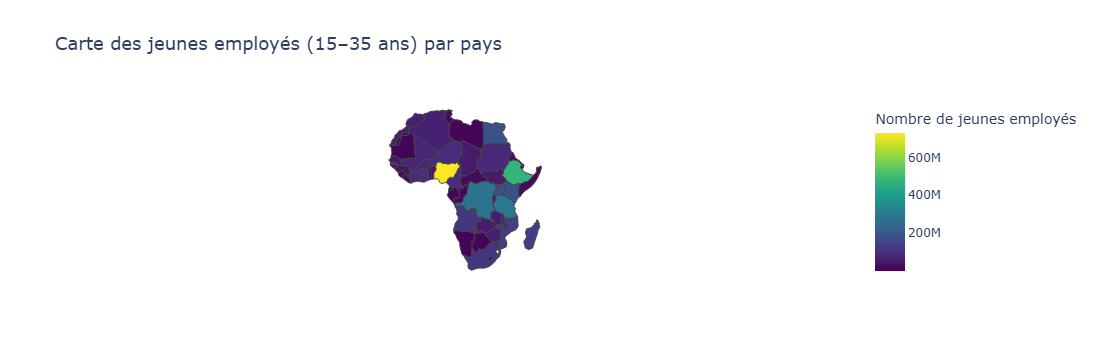

In [19]:
# Agrégation du total de jeunes employés par pays
df_country_total = df_sector_employed_clean.groupby("country")["employed_population"].sum().reset_index()

# Carte choroplèthe
fig = px.choropleth(
    df_country_total,
    locations="country",
    locationmode="country names",
    color="employed_population",
    color_continuous_scale="Viridis",
    title="Carte des jeunes employés (15–35 ans) par pays",
    labels={"employed_population": "Nombre de jeunes employés"}
)

# Ajustements géographiques
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_font_size=18)

fig.show()

# 4. Construsction de modèles de prévision pour projeter l’emploi des jeunes par secteur et par genre

In [21]:
# 1. Agréger les 3 tables avant fusion
df_sector_agg = df_sector_employed_clean.groupby(["year", "country", "gender", "sector"])["employed_population"].sum().reset_index()
df_edu_agg = df_education_combined_clean.groupby(["year", "country", "gender", "education_level"])["population"].sum().reset_index()
df_urban_agg = df_rural_urban_clean.groupby(["year", "country", "gender", "urban"])["rural_urban_employed_population"].sum().reset_index()

# 2. Fusion sécurisée sans explosion
df_merge = df_sector_agg.merge(
    df_edu_agg, on=["year", "country", "gender"], how="inner"
).merge(
    df_urban_agg, on=["year", "country", "gender"], how="inner"
)

# 3. Cible = employed_population ; les autres colonnes = features
df_model_final = df_merge[[
    "year", "country", "gender", "education_level", "urban", "sector", "employed_population"
]].dropna()

In [22]:
# Harmoniser les colonnes
df_education_combined_clean = df_education_combined_clean.rename(columns={"sex": "gender"})

# 1. Agréger par blocs utiles
df_sector_agg = df_sector_employed_clean.groupby(
    ["year", "country", "gender", "sector"]
)["employed_population"].sum().reset_index()

df_edu_agg = df_education_combined_clean.groupby(
    ["year", "country", "gender", "education_level"]
)["population"].sum().reset_index()

df_urban_agg = df_rural_urban_clean.groupby(
    ["year", "country", "gender", "urban"]
)["rural_urban_employed_population"].sum().reset_index()

# 2. Fusion progressive sur les dimensions communes
df_merge = df_sector_agg.merge(
    df_edu_agg, on=["year", "country", "gender"], how="inner"
).merge(
    df_urban_agg, on=["year", "country", "gender"], how="inner"
)

# 3. Nettoyage final pour la modélisation
df_model_final = df_merge[[
    "year", "country", "gender", "education_level", "urban", "sector", "employed_population"
]].dropna()

print("Table finale prête pour la modélisation :", df_model_final.shape)
display(df_model_final.head())

Table finale prête pour la modélisation : (189224, 7)


,year,country,gender,education_level,urban,sector,employed_population
0,2015,Algeria,female,no,Rural,Accommodation and food service activities,4949
1,2015,Algeria,female,no,Urban,Accommodation and food service activities,4949
2,2015,Algeria,female,primary,Rural,Accommodation and food service activities,4949
3,2015,Algeria,female,primary,Urban,Accommodation and food service activities,4949
4,2015,Algeria,female,secondary,Rural,Accommodation and food service activities,4949


In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Encodage des variables catégorielles
df_encoded = df_model_final.copy()
label_encoders = {}
cat_cols = ["country", "gender", "education_level", "urban", "sector"]

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# 2. Split complet
X = df_encoded[["year", "country", "gender", "education_level", "urban", "sector"]]
y = df_encoded["employed_population"]

# On prend un échantillon pour aller vite
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=10000, random_state=42)

# 3. Grilles réduites
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5]
}

xgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6],
    "learning_rate": [0.1, 0.3],
    "subsample": [0.8, 1]
}

# 4. GridSearch pour RandomForest
print("Optimisation RandomForestRegressor...")
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=3,
    scoring="neg_root_mean_squared_error",
    verbose=1,
    n_jobs=-1
)
rf_grid.fit(X_sample, y_sample)

# 5. GridSearch pour XGBRegressor
print("Optimisation XGBRegressor...")
xgb_grid = GridSearchCV(
    XGBRegressor(random_state=42, verbosity=0),
    xgb_params,
    cv=3,
    scoring="neg_root_mean_squared_error",
    verbose=1,
    n_jobs=-1
)
xgb_grid.fit(X_sample, y_sample)

# 6. Évaluation sur test complet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def eval_model(y_true, y_pred):
    return {
        "MAE": round(mean_absolute_error(y_true, y_pred), 2),
        "RMSE": round(np.sqrt(mean_squared_error(y_true, y_pred)), 2),
        "R²": round(r2_score(y_true, y_pred), 4)
    }

rf_best = rf_grid.best_estimator_
xgb_best = xgb_grid.best_estimator_

rf_scores = eval_model(y_test, rf_best.predict(X_test))
xgb_scores = eval_model(y_test, xgb_best.predict(X_test))

# 7. Résumé
print("\n Résultats optimisés (évalués sur le jeu complet) :")
print("RandomForestRegressor :", rf_scores, "| Best params :", rf_grid.best_params_)
print("XGBRegressor :", xgb_scores, "| Best params :", xgb_grid.best_params_)

# 8. Choix du meilleur
if rf_scores["RMSE"] < xgb_scores["RMSE"]:
    print("\nModèle retenu : RandomForestRegressor")
    best_model = rf_best
else:
    print("\nModèle retenu : XGBRegressor")
    best_model = xgb_best

Optimisation RandomForestRegressor...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Optimisation XGBRegressor...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

 Résultats optimisés (évalués sur le jeu complet) :
RandomForestRegressor : {'MAE': 30917.32, 'RMSE': 96872.07, 'R²': 0.9789} | Best params : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
XGBRegressor : {'MAE': 45620.81, 'RMSE': 105777.68, 'R²': 0.9749} | Best params : {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1}

Modèle retenu : RandomForestRegressor


# Scénario 1 : Egalité hommes femmes (+20% de femmes)

In [25]:
from ipywidgets import interact, Dropdown, Button, Output, VBox
from IPython.display import FileLink, display
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Années de prévision
annees = list(range(2025, 2031))

# Dropdowns dynamiques
pays_liste = ["Tous les pays"] + sorted(df_model_final["country"].dropna().unique().tolist())
secteurs_liste = ["Tous les secteurs"] + sorted(df_model_final["sector"].dropna().unique().tolist())

@interact(
    pays=Dropdown(options=pays_liste, description="Pays"),
    secteur=Dropdown(options=secteurs_liste, description="Secteur")
)
def prevision_parite_emploi(pays, secteur):
    # Encodage genre
    code_m = label_encoders["gender"].transform(["male"])[0]
    code_f = label_encoders["gender"].transform(["female"])[0]

    # Init prédictions
    total_pred_m = np.zeros(len(annees))
    total_pred_f = np.zeros(len(annees))

    secteurs_cibles = [secteur] if secteur != "Tous les secteurs" else secteurs_liste[1:]

    for s in secteurs_cibles:
        try:
            code_s = label_encoders["sector"].transform([s])[0]
            code_c = label_encoders["country"].transform([pays])[0] if pays != "Tous les pays" else None
            code_e = label_encoders["education_level"].transform(["secondary"])[0]
            code_u = label_encoders["urban"].transform(["Urban"])[0]

            df_m = pd.DataFrame({
                "year": annees,
                "country": [code_c if code_c is not None else 0] * len(annees),
                "gender": [code_m] * len(annees),
                "education_level": [code_e] * len(annees),
                "urban": [code_u] * len(annees),
                "sector": [code_s] * len(annees)
            })

            df_f = df_m.copy()
            df_f["gender"] = code_f

            if pays == "Tous les pays":
                pred_m = best_model.predict(df_m) / len(label_encoders["country"].classes_)
                pred_f = best_model.predict(df_f) / len(label_encoders["country"].classes_)
            else:
                pred_m = best_model.predict(df_m)
                pred_f = best_model.predict(df_f)

            total_pred_m += pred_m
            total_pred_f += pred_f

        except Exception as e:
            print(f"Erreur pour le secteur {s} : {e}")
            continue

    # Scénario de parité +20 % sur l'emploi féminin
    pred_f_scenario = total_pred_f * 1.20

    # Tracé du graphique
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=annees, y=total_pred_m, mode='lines+markers', name="Hommes", line=dict(color="#2ca02c")))
    fig.add_trace(go.Scatter(x=annees, y=total_pred_f, mode='lines+markers', name="Femmes (prévision actuelle)", line=dict(color="#d62728")))
    fig.add_trace(go.Scatter(x=annees, y=pred_f_scenario, mode='lines+markers', name="Femmes (scénario +20%)", line=dict(color="#ff9896", dash='dash')))

    titre_pays = pays if pays != "Tous les pays" else "ensemble des pays"
    titre_secteur = secteur if secteur != "Tous les secteurs" else "tous les secteurs"

    fig.update_layout(
        title=f"Scénario : Parité (+20 % emploi féminin) – ({titre_pays}, {titre_secteur})",
        xaxis_title="Années",
        yaxis_title="Population prédite",
        title_font_size=18,
        legend_title="Genre / Scénario"
    )
    fig.show()

    # Export CSV
    df_export = pd.DataFrame({
        "Année": annees,
        "Hommes": total_pred_m.round().astype(int),
        "Femmes (prévision actuelle)": total_pred_f.round().astype(int),
        "Femmes (scénario +20%)": pred_f_scenario.round().astype(int),
        "Pays": pays,
        "Secteur": secteur
    })

    output = Output()
    button = Button(description="📥 Générer le CSV")

    def on_button_click(b):
        filename = f"parite_emploi_{secteur.replace(' ', '_')}_{pays.replace(' ', '_')}.csv"
        df_export.to_csv(filename, index=False)
        with output:
            output.clear_output()
            display(FileLink(filename, result_html_prefix="👉 Télécharger ici : "))

    button.on_click(on_button_click)
    display(VBox([button, output]))

interactive(children=(Dropdown(description='Pays', options=('Tous les pays', 'Algeria', 'Angola', 'Benin', 'Bo…

# Scénario 2 : Parité + Réduction du chômage des diplômés

In [27]:
annees = list(range(2025, 2031))

# Listes de sélection
pays_disponibles = ["Tous les pays"] + sorted(df_model_final["country"].dropna().unique().tolist())
secteurs_disponibles = ["Tous les secteurs"] + sorted(df_model_final["sector"].dropna().unique().tolist())

@interact(
    country=Dropdown(options=pays_disponibles, description="Pays"),
    secteur=Dropdown(options=secteurs_disponibles, description="Secteur")
)
def scenario_combine_parite_chomage(country, secteur):
    fig = go.Figure()
    output = Output()
    button = Button(description="📥 Générer le CSV")

    total_emploi_f = np.zeros(len(annees))
    total_emploi_f_scenario = np.zeros(len(annees))

    # Ordre des colonnes d'entraînement
    feature_order = ["year", "country", "gender", "education_level", "urban", "sector"]

    # EMPLOI FEMMES
    secteurs_cibles = [secteur] if secteur != "Tous les secteurs" else secteurs_disponibles[1:]
    for s in secteurs_cibles:
        try:
            s_code = label_encoders["sector"].transform([s])[0]
            f_code = label_encoders["gender"].transform(["female"])[0]
            c_code = label_encoders["country"].transform([country])[0] if country != "Tous les pays" else None
            e_code = label_encoders["education_level"].transform(["secondary"])[0]
            u_code = label_encoders["urban"].transform(["Urban"])[0]

            df_future = pd.DataFrame({
                "year": annees,
                "gender": [f_code] * len(annees),
                "sector": [s_code] * len(annees),
                "country": [c_code if c_code is not None else 0] * len(annees),
                "education_level": [e_code] * len(annees),
                "urban": [u_code] * len(annees)
            })

            # Réordonner les colonnes
            df_future = df_future[feature_order]

            pred = best_model.predict(df_future)
            if country == "Tous les pays":
                pred = pred / len(label_encoders["country"].classes_)

            total_emploi_f += pred
            total_emploi_f_scenario += pred * 1.20

        except Exception as e:
            print(f"Erreur secteur {s} : {e}")
            continue

    # COURBES EMPLOI FEMMES
    fig.add_trace(go.Scatter(x=annees, y=total_emploi_f, name="Femmes (emploi – prévision actuelle)",
                             mode="lines+markers", line=dict(color="#d62728")))
    fig.add_trace(go.Scatter(x=annees, y=total_emploi_f_scenario, name="Femmes (emploi – scénario +20%)",
                             mode="lines+markers", line=dict(color="#ff9896", dash="dash")))

    # CHÔMAGE DIPLÔMÉS
    df_tmp = df_education_combined_clean.copy()
    df_tmp = df_tmp.rename(columns={"sex": "gender", "education": "education_level"})

    if country != "Tous les pays":
        df_chom = df_tmp[
            (df_tmp["status"] == "unemployed") &
            (df_tmp["education_level"].isin(["secondary", "tertiary"])) &
            (df_tmp["country"] == country)
        ]
    else:
        df_chom = df_tmp[
            (df_tmp["status"] == "unemployed") &
            (df_tmp["education_level"].isin(["secondary", "tertiary"]))
        ]

    df_chom_agg = df_chom[df_chom["year"] <= 2023].groupby("year")["population"].sum().reset_index()

    base_val = df_chom_agg["population"].values[-1] if not df_chom_agg.empty else 0
    pred_chomage = np.full(len(annees), base_val)
    pred_chomage_scenario = base_val * (1 - 0.05) ** np.arange(len(annees))

    fig.add_trace(go.Scatter(x=annees, y=pred_chomage, name="Chômage diplômés (prévision actuelle)",
                             mode="lines+markers", line=dict(color="#1f77b4")))
    fig.add_trace(go.Scatter(x=annees, y=pred_chomage_scenario, name="Chômage diplômés (scénario –5%)",
                             mode="lines+markers", line=dict(color="#aec7e8", dash="dash")))

    # TITRES
    titre_pays = country if country != "Tous les pays" else "ensemble des pays"
    titre_secteur = secteur if secteur != "Tous les secteurs" else "tous les secteurs"

    fig.update_layout(
        title=f"Scénario combiné : Parité + Réduction chômage diplômés - ({titre_pays}, {titre_secteur})",
        xaxis_title="Années",
        yaxis_title="Population prédite",
        title_font_size=18,
        legend_title="Prévisions croisées"
    )
    fig.show()

    # EXPORT CSV
    df_export = pd.DataFrame({
        "Année": annees,
        "Emploi femmes (prévu)": total_emploi_f.round(),
        "Emploi femmes (+20%)": total_emploi_f_scenario.round(),
        "Chômage diplômés (prévu)": pred_chomage.round(),
        "Chômage diplômés (-5%)": pred_chomage_scenario.round(),
        "Pays": country,
        "Secteur": secteur
    })

    def on_click(b):
        with output:
            output.clear_output()
            filename = f"scenario_combine_parite_chomage_{country.replace(' ', '_')}_{secteur.replace(' ', '_')}.csv"
            df_export.to_csv(filename, index=False)
            display(FileLink(filename, result_html_prefix="👉 Télécharger le fichier CSV ici : "))

    button.on_click(on_click)
    display(VBox([button, output]))

interactive(children=(Dropdown(description='Pays', options=('Tous les pays', 'Algeria', 'Angola', 'Benin', 'Bo…

# Scénario 3 : Formation + Inclusion

In [29]:
annees = list(range(2025, 2031))

pays_liste = ["Tous les pays"] + sorted(df_model_final["country"].dropna().unique().tolist())
secteurs_liste = ["Tous les secteurs"] + sorted(df_model_final["sector"].dropna().unique().tolist())

@interact(
    country=Dropdown(options=pays_liste, description="Pays"),
    secteur=Dropdown(options=secteurs_liste, description="Secteur")
)
def scenario_formation_inclusion(country, secteur):
    fig = go.Figure()
    output = Output()
    button = Button(description="📥 Générer le CSV")
    data_present = False
    df_export = None

    feature_order = ["year", "country", "gender", "education_level", "urban", "sector"]

    # EMPLOI FEMMES + SCÉNARIO
    try:
        secteurs_cibles = [secteur] if secteur != "Tous les secteurs" else secteurs_liste[1:]
        f_code = label_encoders["gender"].transform(["female"])[0]
        c_code = label_encoders["country"].transform([country])[0] if country != "Tous les pays" else None
        e_code = label_encoders["education_level"].transform(["secondary"])[0]
        u_code = label_encoders["urban"].transform(["Urban"])[0]

        total_f = np.zeros(len(annees))

        for s in secteurs_cibles:
            try:
                s_code = label_encoders["sector"].transform([s])[0]
                df_future_f = pd.DataFrame({
                    "year": annees,
                    "country": [c_code if c_code is not None else 0] * len(annees),
                    "gender": [f_code] * len(annees),
                    "education_level": [e_code] * len(annees),
                    "urban": [u_code] * len(annees),
                    "sector": [s_code] * len(annees)
                })
                df_future_f = df_future_f[feature_order]

                pred_f = best_model.predict(df_future_f)
                if country == "Tous les pays":
                    pred_f = pred_f / len(label_encoders["country"].classes_)
                total_f += pred_f
            except Exception as e:
                print(f"Erreur secteur {s} : {e}")
                continue

        y_femmes = total_f
        y_femmes_scenario = y_femmes * 1.20

        fig.add_trace(go.Scatter(
            x=annees,
            y=y_femmes,
            name="Femmes (emploi – prévision actuelle)",
            mode="lines+markers",
            line=dict(color="#d62728")
        ))
        fig.add_trace(go.Scatter(
            x=annees,
            y=y_femmes_scenario,
            name="Femmes (emploi – scénario +20%)",
            mode="lines+markers",
            line=dict(color="#ff9896", dash="dash")
        ))
        data_present = True

    except Exception as e:
        print(f"Erreur emploi femmes : {e}")

    # RÉDUCTION INACTIFS / CHÔMEURS DIPLÔMÉS
    try:
        df_tmp = df_education_combined_clean.rename(columns={"sex": "gender", "education": "education_level"})
        df_cible = df_tmp[
            (df_tmp["status"].isin(["inactive", "unemployed"])) &
            (df_tmp["education_level"].isin(["secondary", "tertiary"]))
        ]
        if country != "Tous les pays":
            df_cible = df_cible[df_cible["country"] == country]

        df_hist = df_cible.groupby("year")["population"].sum().reset_index()
        df_hist = df_hist[df_hist["year"] <= 2023]

        if not df_hist.empty:
            base_val = df_hist["population"].values[-1]
            pred_norm = np.full(len(annees), base_val)
            pred_scenario = base_val * (1 - 0.30) ** np.arange(len(annees))

            fig.add_trace(go.Scatter(
                x=annees,
                y=pred_norm,
                name="Inactifs/Chômeurs diplômés (prévu)",
                mode="lines+markers",
                line=dict(color="#1f77b4")
            ))
            fig.add_trace(go.Scatter(
                x=annees,
                y=pred_scenario,
                name="Inactifs/Chômeurs diplômés (-30%)",
                mode="lines+markers",
                line=dict(color="#aec7e8", dash="dash")
            ))
            data_present = True
    except Exception as e:
        print(f"Erreur chômage diplômés : {e}")

    # AFFICHAGE FINAL
    titre_pays = country if country != "Tous les pays" else "tous les pays"
    titre_secteur = secteur if secteur != "Tous les secteurs" else "tous les secteurs"

    fig.update_layout(
        title=f"Scénario combiné : Formation + Inclusion (+20 % emploi féminin) – ({titre_pays}, {titre_secteur})",
        xaxis_title="Années",
        yaxis_title="Population prédite",
        title_font_size=18,
        legend_title="Composantes"
    )
    fig.show()

    # EXPORT CSV
    if data_present:
        df_export = pd.DataFrame({
            "Année": annees,
            "Emploi femmes (prévu)": y_femmes.round(),
            "Emploi femmes (+20%)": y_femmes_scenario.round()
        })

        if 'pred_norm' in locals() and 'pred_scenario' in locals():
            df_export["Inactifs/Chômeurs diplômés (prévu)"] = pred_norm.round()
            df_export["Inactifs/Chômeurs diplômés (-30%)"] = pred_scenario.round()

        df_export["Pays"] = country
        df_export["Secteur"] = secteur

        def on_click(b):
            filename = f"scenario_formation_inclusion_{country.replace(' ', '_')}_{secteur.replace(' ', '_')}.csv"
            df_export.to_csv(filename, index=False)
            with output:
                output.clear_output()
                display(FileLink(filename, result_html_prefix="👉 Télécharger le fichier CSV ici : "))

        button.on_click(on_click)
        display(VBox([button, output]))
    else:
        print("Aucune donnée exploitable pour ce filtre.")

interactive(children=(Dropdown(description='Pays', options=('Tous les pays', 'Algeria', 'Angola', 'Benin', 'Bo…

# Scénario 4 : Décentralisation + Valorisation des chaînes de valeur locales

In [31]:
# Années de simulation
annees = list(range(2025, 2031))

# Dropdowns pays/secteurs
pays_liste = ["Tous les pays"] + sorted(df_model_final["country"].dropna().unique().tolist())
secteurs_liste = ["Tous les secteurs"] + sorted(df_model_final["sector"].dropna().unique().tolist())

@interact(
    country=Dropdown(options=pays_liste, description="Pays"),
    secteur=Dropdown(options=secteurs_liste, description="Secteur")
)
def scenario_valorisation_locale_genre_egal(country, secteur):
    fig = go.Figure()
    output = Output()
    button = Button(description="📥 Générer le CSV")
    feature_order = ["year", "country", "gender", "education_level", "urban", "sector"]

    try:
        secteurs_cibles = [secteur] if secteur != "Tous les secteurs" else secteurs_liste[1:]
        c_code = label_encoders["country"].transform([country])[0] if country != "Tous les pays" else 0
        e_code = label_encoders["education_level"].transform(["secondary"])[0]
        u_code = label_encoders["urban"].transform(["Rural"])[0]
        f_code = label_encoders["gender"].transform(["female"])[0]
        m_code = label_encoders["gender"].transform(["male"])[0]

        total_f = np.zeros(len(annees))
        total_f_scenario = np.zeros(len(annees))
        total_m = np.zeros(len(annees))
        total_m_scenario = np.zeros(len(annees))

        for s in secteurs_cibles:
            try:
                s_code = label_encoders["sector"].transform([s])[0]

                df_f = pd.DataFrame({
                    "year": annees,
                    "country": [c_code] * len(annees),
                    "gender": [f_code] * len(annees),
                    "education_level": [e_code] * len(annees),
                    "urban": [u_code] * len(annees),
                    "sector": [s_code] * len(annees)
                })[feature_order]

                df_m = pd.DataFrame({
                    "year": annees,
                    "country": [c_code] * len(annees),
                    "gender": [m_code] * len(annees),
                    "education_level": [e_code] * len(annees),
                    "urban": [u_code] * len(annees),
                    "sector": [s_code] * len(annees)
                })[feature_order]

                pred_f = best_model.predict(df_f)
                pred_m = best_model.predict(df_m)

                if country == "Tous les pays":
                    n_countries = len(label_encoders["country"].classes_)
                    pred_f /= n_countries
                    pred_m /= n_countries

                total_f += pred_f
                total_f_scenario += pred_f * 1.30  # Femmes +30%
                total_m += pred_m
                total_m_scenario += pred_m * 1.30  # Hommes +30%

            except Exception as e:
                print(f"Erreur secteur {s} : {e}")
                continue

        # Tracés
        fig.add_trace(go.Scatter(x=annees, y=total_f, name="Femmes (prévu)", mode="lines+markers", line=dict(color="#d62728")))
        fig.add_trace(go.Scatter(x=annees, y=total_f_scenario, name="Femmes (+30%)", mode="lines+markers", line=dict(color="#ff9896", dash="dash")))
        fig.add_trace(go.Scatter(x=annees, y=total_m, name="Hommes (prévu)", mode="lines+markers", line=dict(color="#1f77b4")))
        fig.add_trace(go.Scatter(x=annees, y=total_m_scenario, name="Hommes (+30%)", mode="lines+markers", line=dict(color="#aec7e8", dash="dash")))

        fig.update_layout(
            title=f"Scénario combiné : Décentralisation & Valorisation des chaînes locales – ({country}, {secteur})",
            xaxis_title="Années",
            yaxis_title="Population prédite (rural)",
            title_font_size=18,
            legend_title="Genre / scénario"
        )
        fig.show()

        # Export CSV
        df_export = pd.DataFrame({
            "Année": annees,
            "Femmes (prévu)": total_f.round(),
            "Femmes (+30%)": total_f_scenario.round(),
            "Hommes (prévu)": total_m.round(),
            "Hommes (+30%)": total_m_scenario.round(),
            "Pays": country,
            "Secteur": secteur
        })

        def on_click(b):
            filename = f"scenario_valorisation_locale_genre_egal_{country.replace(' ', '_')}_{secteur.replace(' ', '_')}.csv"
            df_export.to_csv(filename, index=False)
            with output:
                output.clear_output()
                display(FileLink(filename, result_html_prefix="👉 Télécharger le fichier CSV ici : "))

        button.on_click(on_click)
        display(VBox([button, output]))

    except Exception as e:
        print(f"Erreur : {e}")

interactive(children=(Dropdown(description='Pays', options=('Tous les pays', 'Algeria', 'Angola', 'Benin', 'Bo…

# Réponses aux questions de la tache 1

# 5. Formulation et explication de quelques enseignements clés apportant une compréhension concrète et exploitable des défis et opportunités liés à l’emploi des jeunes dans la région.